<a href="https://colab.research.google.com/github/SadGosling/MSUAI_Project/blob/main/Attempt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты

Импорт всех необходимых библиотек

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRFClassifier


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Импорт датасета

In [5]:
df = pd.read_csv('db_subset.csv')
df

,внутриклеточная_жидкость,тощая_мт,акм,холестерин,нас._жир,натрий_na,сахара,энергия,вода,пищ._волокна,...,селен_se,фтор_f,хром_cr,цинк_zn,профессия_работники_преимущественно_умственного_труда,профессия_работники_занятые_легким_физическим_трудом,спорт_легкий_спорт,спорт_не_занимаюсь,bmi,target
0,NaN,NaN,NaN,NaN,0.04,11.03,21.41,128.17,495.78,0.72,...,0.21,NaN,NaN,0.17,0,0,0,0,NaN,0
1,NaN,NaN,NaN,NaN,0.02,10.72,12.43,77.82,727.72,0.37,...,0.24,NaN,NaN,0.15,0,0,0,0,NaN,0
2,NaN,NaN,NaN,NaN,0.04,25.63,19.99,147.13,373.79,0.93,...,0.32,NaN,NaN,0.26,1,0,0,0,NaN,0
3,NaN,NaN,NaN,0.53,0.06,4.42,NaN,2.27,0.42,NaN,...,0.17,NaN,NaN,0.03,0,0,0,0,NaN,0
4,NaN,NaN,NaN,1.08,0.05,1.34,NaN,2.94,1.04,NaN,...,0.26,NaN,NaN,0.08,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,30.2,67.3,42.4,477.17,24.50,1797.91,82.62,1354.90,1223.05,12.31,...,60.15,68.55,6.56,4.58,1,0,0,1,35.986159,0
2881,36.1,77.1,51.6,1867.95,34.70,3373.56,81.50,2929.34,3550.36,20.59,...,254.15,179.18,6.91,24.05,1,0,0,1,59.519091,1
2882,19.9,47.5,27.9,356.44,33.42,3321.43,115.59,2744.22,2027.59,34.25,...,146.40,183.49,34.77,12.77,1,0,0,1,31.245237,1
2883,NaN,99.4,NaN,1130.65,61.98,5649.49,114.94,3263.85,4008.62,20.86,...,199.63,86.15,7.51,17.86,1,0,0,1,51.073776,1


# Предобработка датасета

Все признаки имеют числовой вид, посмотрим на распределение классов

In [6]:
df.loc[df['target'] == 0]['target'].count(), df.loc[df['target'] == 1]['target'].count() # классы сбалансированы

(1872, 1013)

<Axes: xlabel='target', ylabel='Count'>

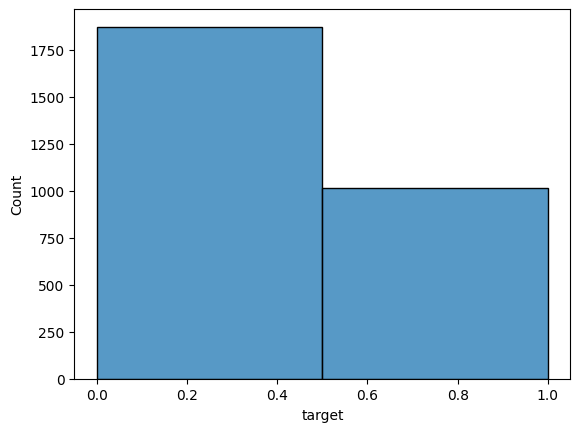

In [26]:
sns.histplot(df['target'], bins = 2)

Классы находятся в соотношении 2:1, будем считать, что они сбалансированы.

Теперь посмотрим на признаки объектов:

In [27]:
df.columns, len(df.columns)

(Index(['внутриклеточная_жидкость', 'тощая_мт', 'акм', 'холестерин', 'нас._жир',
        'натрий_na', 'сахара', 'энергия', 'вода', 'пищ._волокна',
        'мононенас._жир', 'белки', 'аргинин', 'валин', 'зола', 'полиненас._жир',
        'калий_k', 'крахмал', 'гистидин', 'жиры', 'кальций_ca', 'алкоголь',
        'кремний_si', 'сера_s', 'изолейцин', 'углеводы', 'олеиновая_кислота',
        'магний_mg', 'фруктоза', 'a', 'b1_тиамин', 'b2_рибофлав.',
        'b5_пантотен._кис.', 'b6_пиридоксин', 'b9_фолаты', 'b12_кобаламин',
        'b4_холин', 'β-каротин', 'ретин._эквив.', 'лейцин', 'фосфор_p',
        'омега-3', 'лактоза', 'метионин', 'железо_fe', 'омега-6', 'галактоза',
        'метионин+цистеин', 'c', 'треонин', 'd', 'триптофан', 'e_α-токоферол',
        'гамма-линолен._к-та', 'фенилаланин', 'h_биотин', 'бор_b',
        'фенилаланин+тирозин', 'pp_ниацин', 'ванадий_v', 'йод_i', 'кобальт_co',
        'марганец_mn', 'медь_cu', 'молибден_mo', 'никель_ni', 'селен_se',
        'фтор_f', 'хром_

Поделим датасет на тренировочную и тестовую выборки, отнормируем их, а затем уже попробуем выбрать наиболее значимые признаки.

In [8]:
x = df.drop(columns=['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3,shuffle = True)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
x_train

,внутриклеточная_жидкость,тощая_мт,акм,холестерин,нас._жир,натрий_na,сахара,энергия,вода,пищ._волокна,...,никель_ni,селен_se,фтор_f,хром_cr,цинк_zn,профессия_работники_преимущественно_умственного_труда,профессия_работники_занятые_легким_физическим_трудом,спорт_легкий_спорт,спорт_не_занимаюсь,bmi
278,NaN,NaN,NaN,NaN,0.36,59.08,28.36,162.80,273.67,7.72,...,17.93,0.21,28.38,7.13,0.37,0,0,0,0,NaN
1225,NaN,NaN,NaN,476.18,20.47,2102.70,83.51,1421.42,1629.31,15.67,...,35.20,79.88,63.16,13.07,7.52,0,1,0,0,21.007668
2243,NaN,NaN,NaN,1041.12,56.67,3910.13,118.57,2848.20,2256.14,28.47,...,32.05,140.10,117.16,11.35,19.17,1,0,0,1,46.680298
1547,NaN,NaN,NaN,184.67,24.06,1430.49,108.23,1982.33,1433.55,14.50,...,20.79,80.00,115.64,7.33,6.77,0,0,0,0,14.876033
1336,NaN,NaN,NaN,546.11,24.86,2211.68,70.30,1653.29,1419.84,20.58,...,62.43,101.97,90.81,18.60,11.07,1,0,0,1,31.608139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,NaN,NaN,NaN,856.76,77.30,6999.30,446.47,5921.81,4531.72,75.65,...,100.57,236.24,279.64,30.23,19.71,0,0,0,0,18.742191
1095,NaN,NaN,NaN,559.71,40.55,4739.27,127.80,2209.45,1937.00,34.91,...,97.27,105.95,160.50,31.88,8.47,0,0,0,0,38.866027
1130,NaN,NaN,NaN,305.58,14.26,1604.01,43.72,986.01,454.53,9.35,...,11.29,56.95,17.91,3.09,5.47,0,1,1,0,23.986870
1294,NaN,54.0,NaN,236.74,37.34,3496.48,76.52,2475.67,1106.71,22.05,...,32.91,90.55,146.92,8.88,5.54,1,0,0,1,28.886631


In [13]:
sfs = SequentialFeatureSelector(
    XGBClassifier(),  # represents the classifier
    k_features=5,
    forward=True,
    floating=True,
    scoring="accuracy",  # means that the selection will be decided by the accuracy of the classifier.
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
)

sfs.fit(x_train, y_train)

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_...
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          floating=True, k_features=(5, 5), scoring='accuracy')

In [14]:
df_temp = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
list(df_temp["feature_idx"].values[-1])

[0, 1, 46, 63, 74]

Для дальнейшей работы возьмем данные 5 наиболее значимых признаков.

In [15]:
x_train_sel = x_train.iloc[:,[0, 1, 46, 63, 74]]
x_test_sel = x_test.iloc[:,[0, 1, 46, 63, 74]]
x_test

,внутриклеточная_жидкость,тощая_мт,акм,холестерин,нас._жир,натрий_na,сахара,энергия,вода,пищ._волокна,...,никель_ni,селен_se,фтор_f,хром_cr,цинк_zn,профессия_работники_преимущественно_умственного_труда,профессия_работники_занятые_легким_физическим_трудом,спорт_легкий_спорт,спорт_не_занимаюсь,bmi
471,NaN,NaN,NaN,84.73,12.62,1162.13,412.32,2416.21,5265.53,72.71,...,246.20,20.97,308.33,104.40,6.87,0,0,0,0,NaN
1453,NaN,NaN,NaN,484.84,43.99,3423.05,67.63,2277.19,1090.88,20.42,...,29.97,140.64,116.72,9.83,13.84,0,0,0,0,NaN
2379,51.1,69.7,NaN,2264.43,49.02,7453.43,109.83,3408.11,1468.51,33.89,...,26.79,234.87,103.59,10.78,15.87,1,0,0,1,37.764115
1601,NaN,NaN,NaN,576.51,62.62,6263.51,206.78,4744.14,2358.80,60.14,...,83.28,194.78,243.55,22.72,16.18,0,0,0,0,30.204520
1094,NaN,NaN,NaN,189.87,30.05,2982.90,48.96,1547.76,1039.40,17.40,...,42.41,85.60,89.60,16.92,5.36,0,0,0,0,38.102552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,NaN,NaN,NaN,90.33,4.58,2422.54,5.02,245.62,165.01,0.17,...,0.18,17.50,0.34,NaN,0.84,1,0,1,0,17.669297
2647,NaN,NaN,NaN,672.81,40.71,2637.44,123.91,2656.63,1970.55,21.72,...,25.73,170.96,135.95,10.60,26.29,1,0,0,0,30.835492
2876,NaN,86.8,NaN,645.34,49.18,3858.82,114.13,4022.82,1565.22,48.91,...,17.12,151.32,93.67,6.41,19.27,1,0,0,1,44.081032
2134,NaN,NaN,NaN,342.29,20.46,2141.30,126.15,1659.18,1389.02,12.41,...,13.77,81.91,26.53,4.96,9.06,0,0,0,0,35.995412


Видно, что в датасете есть утечки данных (значения NaN), классический Random Forest Classifier из sklearn.ensemble не может работать с такими данными, поэтому есть несколько вариантов дальнейшей работы:


1.   Работать с датасетом RF из библиотеки XGBoost, он поддерживает работу с пропусками в данных
2.   Устранить пропуски при помощи Imputer-а, и обработать его классическим RF

Причем поиск оптимальных параметров для RF будет производиться при помощи GridSearchCV



# Обучение модели

## 1. Iterative Imputer + RandomForest

In [29]:
it_imp = IterativeImputer(random_state=42)
x_train_imp = it_imp.fit_transform(x_train_sel)
x_test_imp = it_imp.transform(x_test_sel)

In [30]:
pd.DataFrame(x_train_imp)

,0,1,2,3,4
0,22.804163,50.021853,0.010000,0.28,28.083560
1,19.245639,46.884244,0.040000,1.38,21.007668
2,33.588622,64.579308,0.032246,1.85,46.680298
3,15.733852,42.278467,0.030000,1.00,14.876033
4,25.095175,53.870012,0.000000,1.35,31.608139
...,...,...,...,...,...
2014,18.701598,48.503525,0.050000,3.59,18.742191
2015,29.261351,59.363061,0.000000,1.83,38.866027
2016,20.632823,47.715661,0.030000,0.57,23.986870
2017,24.101245,54.000000,0.010000,1.13,28.886631


In [41]:
parameters = {'criterion':['log_loss'], 'max_depth':[3, 5, 7, 10], 'n_estimators':[100, 500, 1000, 1500]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)
clf.fit(x_train_imp, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['log_loss'], 'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 500, 1000, 1500]})

In [42]:
clf.best_params_, clf.best_score_

({'criterion': 'log_loss', 'max_depth': 7, 'n_estimators': 1000},
 0.7835687787140997)

In [45]:
rfc_best = RandomForestClassifier(n_estimators = 1000, max_depth = 7, criterion='log_loss')
rfc_best.fit(x_train_imp, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=7, n_estimators=1000)

In [48]:
accuracy_score(y_test, rfc_best.predict(x_test_imp)), f1_score(y_test, rfc_best.predict(x_test_imp))

(0.7575057736720554, 0.6289752650176679)

## 2. XGBRFClassifier

In [53]:
parameters = {'criterion':['log_loss'], 'max_depth':[3, 5, 7, 10], 'n_estimators':[50, 100, 500, 1000, 1500]}
xgb_rfc = XGBRFClassifier()
xgb_clf = GridSearchCV(xgb_rfc, parameters)
xgb_clf.fit(x_train_sel, y_train)

GridSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max_cat_...,
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None, ...),
             param_grid={'criterion': ['log_loss'], 'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 500, 1000, 1500]})

In [54]:
xgb_clf.best_params_, xgb_clf.best_score_

({'criterion': 'log_loss', 'max_depth': 7, 'n_estimators': 100},
 0.7949598309706902)

In [55]:
xgb_rfc_best = XGBRFClassifier(criterion='log_loss', max_depth=7, n_estimators=100)
xgb_rfc_best.fit(x_train_sel, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                criterion='log_loss', device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [56]:
accuracy_score(y_test, xgb_rfc_best.predict(x_test_sel)), f1_score(y_test, xgb_rfc_best.predict(x_test_sel))

(0.7782909930715936, 0.7046153846153845)

**Промежуточный итог**: качество классификации получается лучше у XGBRFClassifier